### Let's Do

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv(r"E:/HOTEL_DATA.csv")

In [30]:
type(df)

pandas.core.frame.DataFrame

In [31]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015


In [32]:
df.shape

(119390, 32)

In [33]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### 1) Lets do Data Cleaning!

In [38]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015


In [41]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [44]:
filter1 = (df['children']==0) & (df['adults']==0) & (df['babies']==0)

## Adults,babies & children cant be zero at a same time bcz booking couldn't be possible if these 3 

In [46]:
filter1

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [48]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,NaN,174.0,0,Transient-Party,0.00,0,0,Check-Out,10-06-2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,NaN,174.0,0,Transient,0.00,0,0,Check-Out,10-12-2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,01-04-2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,NaN,122,Transient-Party,0.00,0,0,Check-Out,01-05-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,NaN,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,NaN,NaN,0,Transient,0.00,1,1,Check-Out,07-01-2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,NaN,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,NaN,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [50]:
df.shape

(119390, 32)

In [52]:
df[filter1].shape

(180, 32)

In [54]:
df[~filter1].shape

(119210, 32)

In [56]:
df2 = df[~filter1]

In [58]:
len(df2[(df2['children']==1) & (df2['adults']==0) & (df2['babies']==0)])

4

### 2) Removing Duplicated Data


In [61]:
df2.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119210, dtype: bool

In [62]:
type(df2.duplicated())

pandas.core.series.Series

In [64]:
df2.duplicated().sum()

31980

In [66]:
data= df2.drop_duplicates()

In [68]:
data.shape

(87230, 32)

### 3) Performing descriptive analysis!

In [72]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [74]:
data[['lead_time' , 'total_of_special_requests' , 'adr']].describe().T

## getting (mean, median , std , percentile) of above features

,count,mean,std,min,25%,50%,75%,max
lead_time,87230.0,79.971019,86.058683,0.00,11.00,49.0,125.0,737.0
total_of_special_requests,87230.0,0.698934,0.832051,0.00,0.00,0.0,1.0,5.0
adr,87230.0,106.518031,54.891227,-6.38,72.25,98.2,134.1,5400.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [78]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87226 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [79]:
for col in ['lead_time' , 'total_of_special_requests' , 'adr']:
    print('feature name : {}'.format(col))
    
    for i in range(90,101,1):
        quantile_value = np.quantile(data[col] , q=1/100)
        print('{}th quantile value is {}'.format(i , quantile_value))
    print('\n')

feature name : lead_time
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name : total_of_special_requests
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0


feature name : adr
90th quantile value is 0.0
91th quantile value is 0.0
92th quantile value is 0.0
93th quantile value is 0.0
94th quantile value is 0.0
95th quantile value is 0.0
96th quantile value is 0.0
97th quantile value is 0.0
98th quantile value is 0.0
99th quantile value is 0.0
100th quantile value is 0.0




In [80]:
np.quantile(data['lead_time'] , q=0.9)

204.0

### 4) Perform Spatial Analysis

In [85]:
not_cancelled = data[data['is_canceled']==0]


In [87]:
not_cancelled.head(3)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015


In [89]:
country_wise_data = not_cancelled['country'].value_counts().reset_index()


In [91]:
country_wise_data.columns = ['country' , 'No of guests']


In [93]:
country_wise_data


,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
160,ZMB,1
161,SYC,1
162,MDG,1
163,SMR,1


In [95]:
!pip install chart-studio
!pip install plotly

In [208]:
### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

## iplot() when working in a Jupyter Notebook to
## display the plot in the Ipython notebook.

init_notebook_mode(connected=True)


In [210]:
# show on map

map_guest = px.choropleth(data_frame = country_wise_data , 
              locations= country_wise_data['country'] , 
              color=country_wise_data['No of guests'] , 
              hover_name=country_wise_data['country'] , 
              title= "Home country of Guests"
          
             )

In [98]:
map_guest.show()

### 5)Is any difference between assigned and reserved room types or not?

In [100]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [101]:
pivot = pd.crosstab(index = data['reserved_room_type'] , columns=data['assigned_room_type'] , margins=True  )


In [102]:
pivot


assigned_room_type,A,B,C,D,E,F,G,H,I,K,L,All
reserved_room_type,,,,,,,,,,,,
A,45850,892,1253,6402,1034,390,176,94,205,140,0,56436
B,106,872,0,5,2,2,8,0,0,1,0,996
C,5,2,866,6,4,2,10,9,10,0,0,914
D,295,27,32,15979,657,199,82,9,67,29,0,17376
E,15,2,6,22,5458,383,97,4,40,9,0,6036
F,6,14,0,4,31,2636,113,3,10,3,0,2820
G,5,1,2,0,4,14,1999,7,15,3,0,2050
H,0,0,0,1,0,0,10,579,6,0,0,596
L,1,1,1,0,0,1,0,1,0,0,1,6


In [103]:
### Lets normalize above stuff to get more meaningful insights !

In [104]:
## we will say just normalize over row , hence we need to pass normalize = 'index'

pivot_normalize = pd.crosstab(index = data['reserved_room_type'] , columns=data['assigned_room_type'] , margins=True ,normalize='index' ).round(2)*100

In [105]:
pivot_normalize

assigned_room_type,A,B,C,D,E,F,G,H,I,K,L
reserved_room_type,,,,,,,,,,,
A,81.0,2.0,2.0,11.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
B,11.0,88.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
C,1.0,0.0,95.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
D,2.0,0.0,0.0,92.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,90.0,6.0,2.0,0.0,1.0,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,93.0,4.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,1.0,98.0,0.0,1.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,2.0,97.0,1.0,0.0,0.0
L,17.0,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0


In [106]:
'''

Q.. Is any difference between assigned and reserved room type ?
Ans : Yes 


'''

'\n\nQ.. Is any difference between assigned and reserved room type ?\nAns : Yes \n\n\n'

### 6) Bookings by market segment


In [108]:
data['market_segment'].value_counts()

market_segment
Online TA        51553
Offline TA/TO    13855
Direct           11780
Groups            4922
Corporate         4200
Complementary      692
Aviation           226
Undefined            2
Name: count, dtype: int64

In [109]:
data['market_segment'].value_counts().values

array([51553, 13855, 11780,  4922,  4200,   692,   226,     2],
      dtype=int64)

In [110]:
data['market_segment'].value_counts().index

Index(['Online TA', 'Offline TA/TO', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'],
      dtype='object', name='market_segment')

In [111]:
# pie plot

fig = px.pie(data , 
      values = data['market_segment'].value_counts().values , 
      names = data['market_segment'].value_counts().index)

In [112]:
fig.show()

In [113]:
'''
Most of the bookings have been done in Online mode 

'''

'\nMost of the bookings have been done in Online mode \n\n'

 ## 6b) Analysing Avg.price per night (ADR) of various room-types for all the market segment..

In [115]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

C:\Users\Arul\AppData\Local\Temp\ipykernel_2092\409939474.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='market_segment', ylabel='adr'>

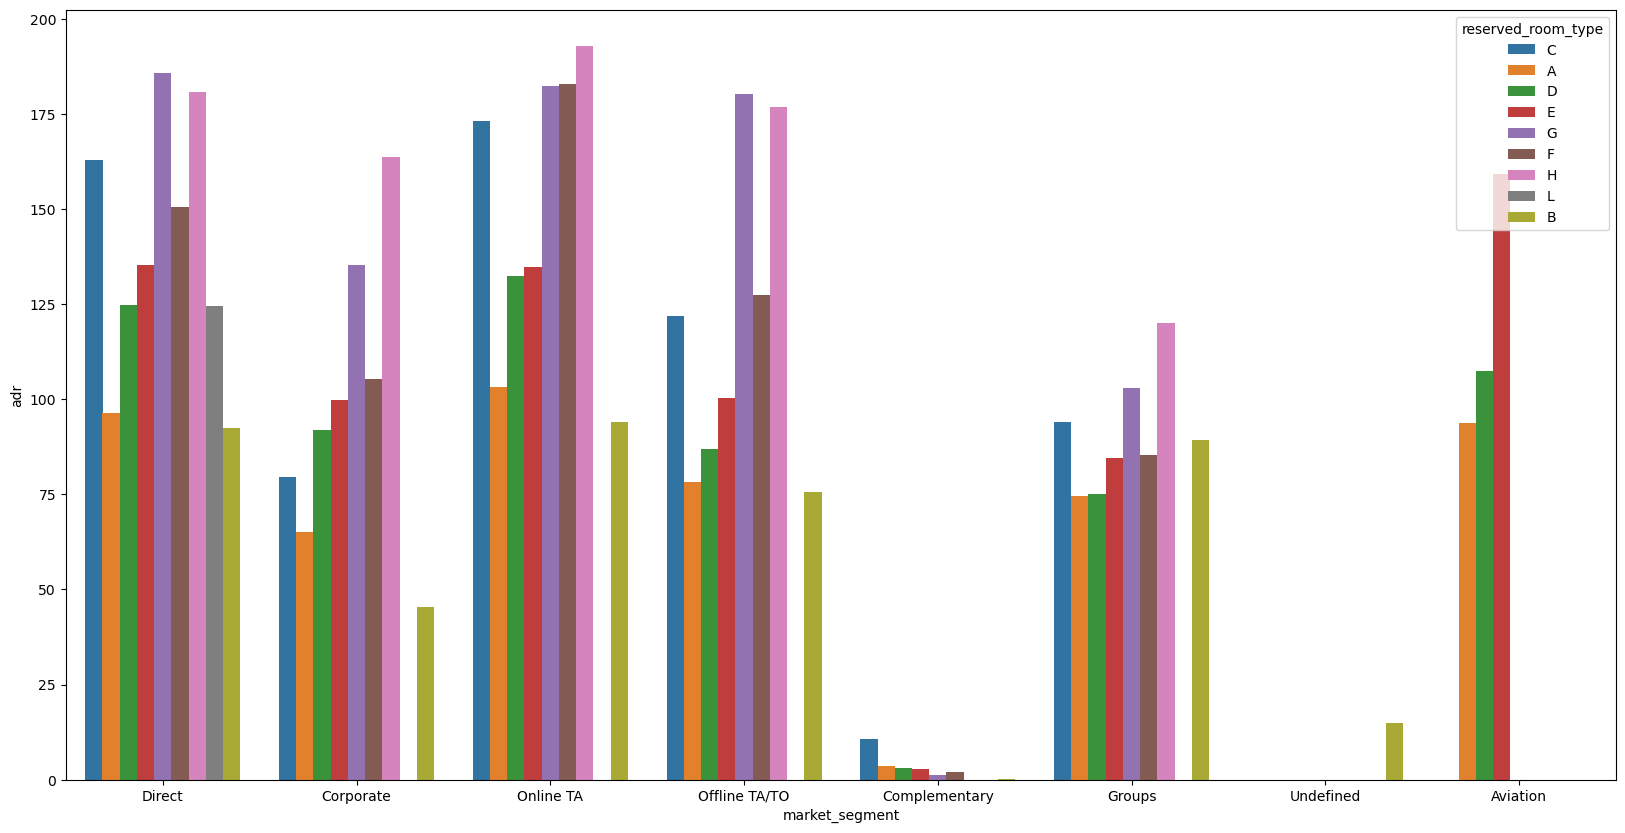

In [116]:
plt.figure(figsize=(20,10))
sns.barplot(x="market_segment" , y="adr" , hue="reserved_room_type" , data=data , ci=None)

### ie this plot tells avg adr of various room-types for all the market segment ..


### 7) Total guests arrival on each day:

In [118]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015


In [119]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [120]:
  dict_month = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12,
       'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6}


In [121]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [122]:
data['arrival_date_month_index'] = data['arrival_date_month'].map(dict_month)

In [123]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index'],
      dtype='object')

In [124]:
data[['arrival_date_year',
       'arrival_date_month_index' , 'arrival_date_day_of_month']]

,arrival_date_year,arrival_date_month_index,arrival_date_day_of_month
0,2015,7,1
1,2015,7,1
2,2015,7,1
3,2015,7,1
4,2015,7,1
...,...,...,...
119385,2017,8,30
119386,2017,8,31
119387,2017,8,31
119388,2017,8,31


In [125]:
data['arrival_date'] = data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month_index'].astype(str) + '-' + data['arrival_date_day_of_month'].astype(str)


'''
we need to use .astype(str) to convert int values to string , 
otherwise we are unable to perform this string concatenation operation ..
'''

'\nwe need to use .astype(str) to convert int values to string , \notherwise we are unable to perform this string concatenation operation ..\n'

In [126]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015,7,2015-7-1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015,7,2015-7-1


In [127]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index', 'arrival_date'],
      dtype='object')

In [128]:
data[['adults', 'children', 'babies']]

,adults,children,babies
0,2,0.0,0
1,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [130]:
data['Total_guests'] = data['adults'] + data['children'] + data['babies']

In [131]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_index,arrival_date,Total_guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,07-01-2015,7,2015-7-1,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,07-01-2015,7,2015-7-1,2.0


In [132]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_index', 'arrival_date', 'Total_guests'],
      dtype='object')

In [133]:
data[['arrival_date', 'Total_guests']]

,arrival_date,Total_guests
0,2015-7-1,2.0
1,2015-7-1,2.0
2,2015-7-1,1.0
3,2015-7-1,1.0
4,2015-7-1,2.0
...,...,...
119385,2017-8-30,2.0
119386,2017-8-31,3.0
119387,2017-8-31,2.0
119388,2017-8-31,2.0


In [134]:
dataNoCancel = data[data['is_canceled']==0]

In [135]:
guest_arrival_series = dataNoCancel.groupby(['arrival_date'])['Total_guests'].sum()

<Axes: xlabel='arrival_date'>

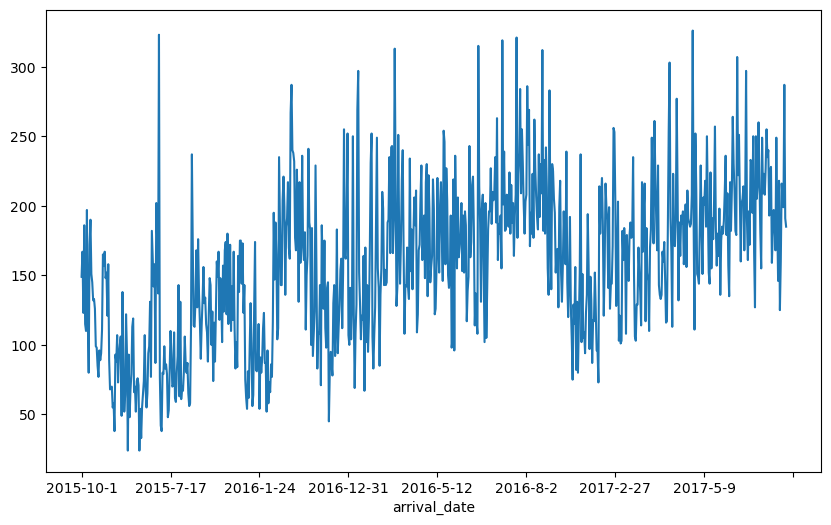

In [136]:
guest_arrival_series.plot(figsize=(10,6))

In [137]:
'''
Q.. Is there any pattern ?
Ans .. No , there is no visible pattern in guests arrival 
in this line-plot as we have some un-even trend ..

'''

'\nQ.. Is there any pattern ?\nAns .. No , there is no visible pattern in guests arrival \nin this line-plot as we have some un-even trend ..\n\n'

 ### 8) Analysing distribution of "guests arrival"

In [140]:
guest_arrival_series


arrival_date
2015-10-1     149.0
2015-10-10    167.0
2015-10-11    123.0
2015-10-12    186.0
2015-10-13    115.0
              ...  
2017-8-5      205.0
2017-8-6      199.0
2017-8-7      287.0
2017-8-8      191.0
2017-8-9      185.0
Name: Total_guests, Length: 793, dtype: float64

In [141]:
type(guest_arrival_series)

### this is a series having indexes as "arrival_dates" ..

pandas.core.series.Series

In [142]:
guest_arrival_series.values

## lets obtain array representation of Series so that it is easy to get our distribution ..

array([149., 167., 123., 186., 115., 110., 197., 118.,  80., 172., 190.,
       151., 145., 132., 133., 126.,  99.,  98.,  85.,  77.,  96.,  89.,
        94., 111., 165., 157., 167., 148., 152., 121., 158.,  89.,  68.,
        69.,  70.,  55.,  58.,  38.,  93.,  88., 107.,  73.,  92., 100.,
       106.,  49., 138.,  81.,  52.,  64., 122.,  95.,  24.,  93.,  48.,
        68.,  79., 113., 119.,  66.,  70.,  52.,  74.,  76.,  71.,  24.,
        54.,  33.,  55.,  64.,  74., 107.,  68.,  55.,  65.,  94.,  99.,
       131.,  77., 182., 161., 142., 158.,  87., 202., 174., 137., 323.,
        77.,  42.,  38.,  80.,  79.,  99.,  83.,  86.,  79.,  48.,  53.,
        80., 110.,  93.,  70.,  71., 109.,  62.,  59.,  80.,  92., 143.,
        63., 131.,  61.,  70.,  67.,  81., 106.,  87.,  80.,  87.,  65.,
        56.,  58., 111., 237., 171., 114., 113., 131., 168., 127., 176.,
       137., 116.,  90., 114., 132., 156., 130., 134., 115., 109.,  88.,
       122., 148., 143., 100., 124.,  74., 116.,  8

<Axes: ylabel='Density'>

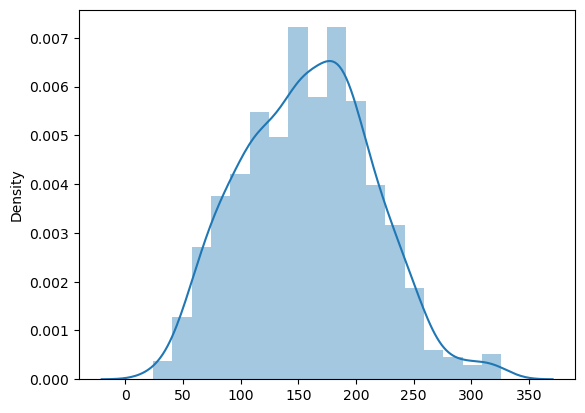

In [145]:
sns.distplot(guest_arrival_series.values )

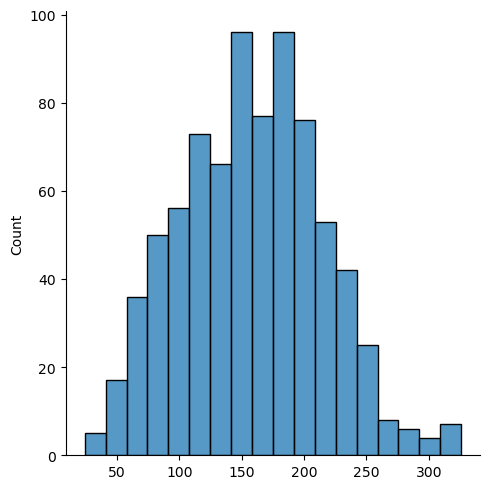

In [147]:
sns.displot(guest_arrival_series.values )

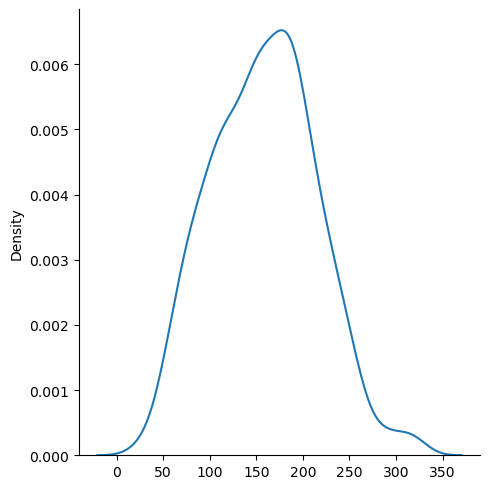

In [158]:
sns.displot(guest_arrival_series.values , kind='kde' )

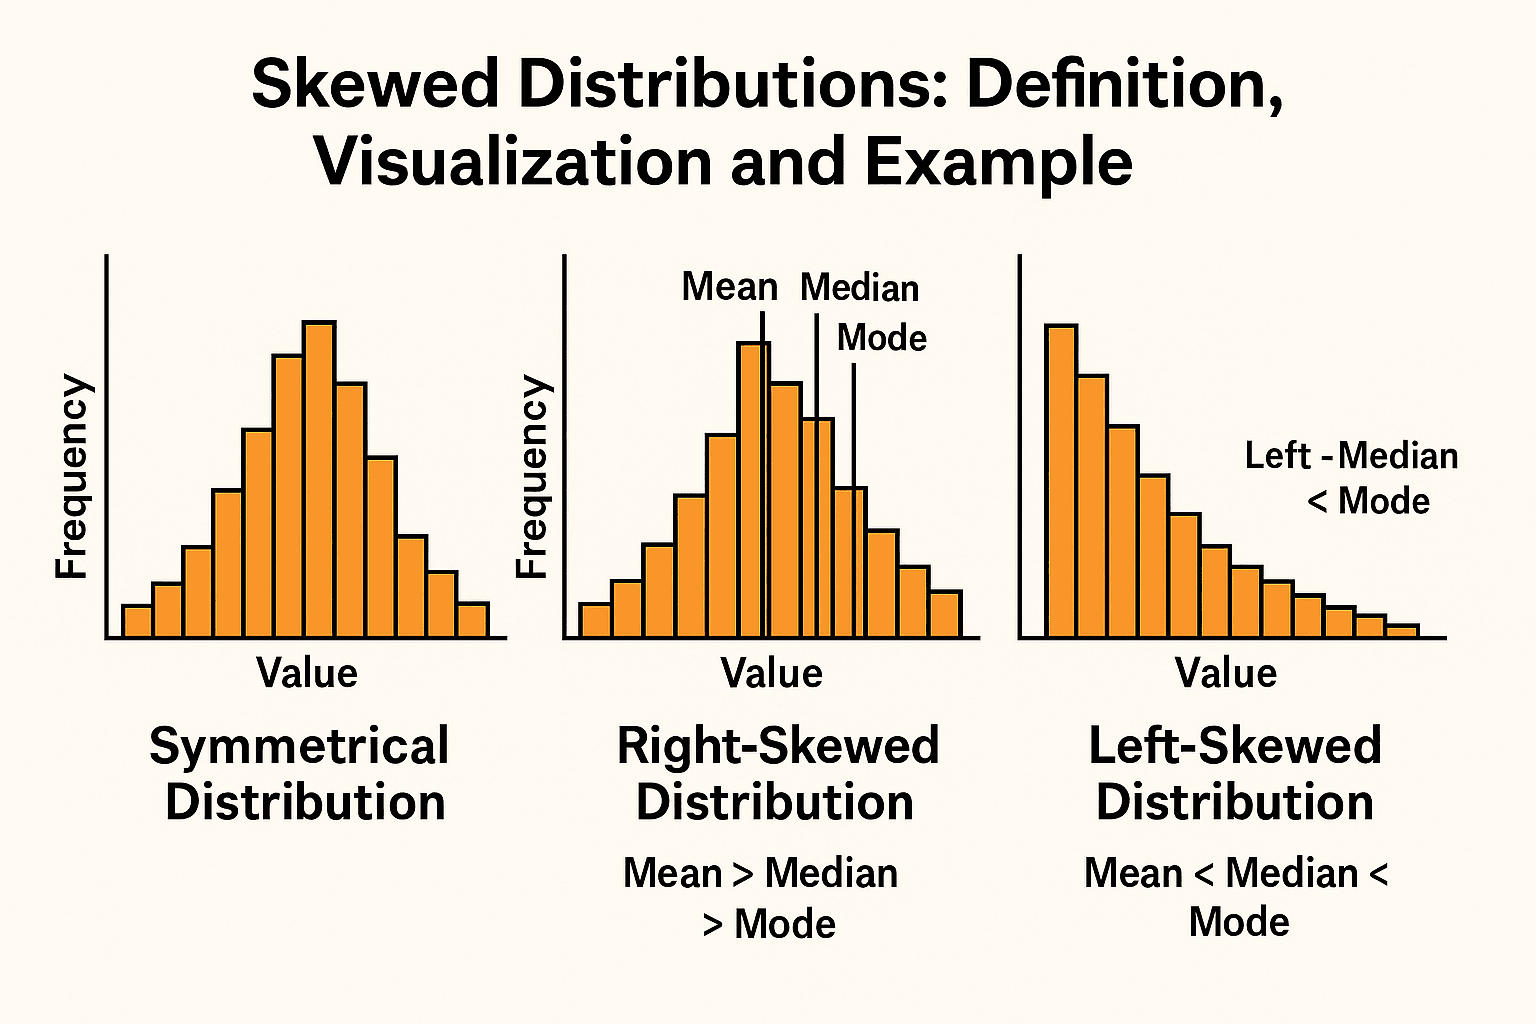

In [206]:
from IPython.display import Image
Image(filename=r"E:\skewed-distribution.png") 

In [163]:
'''

If mean & median are equal , it means 
distribution is symmetrical & bell-shaped 

If mean > median , it means distribution is not symmetrical 
& it is Right skewed (positively skewed )

If mean < median , it means distribution is not symmetrical 
& it is Right skewed (negatively skewed )


'''

'\n\nIf mean & median are equal , it means \ndistribution is symmetrical & bell-shaped \n\nIf mean > median , it means distribution is not symmetrical \n& it is Right skewed (positively skewed )\n\nIf mean < median , it means distribution is not symmetrical \n& it is Right skewed (negatively skewed )\n\n\n'

### 9) Properties of Normal/Gaussian Distribution : 

In [172]:
np.mean(guest_arrival_series.values)

157.92559899117276

In [181]:
np.median(guest_arrival_series.values)

## mean & median are approx equals , 
## it means distribution is a symmetrical & bell-shaped 

158.0

In [191]:
np.std(guest_arrival_series.values)

56.48263702610786

In [193]:
'''

between 1 std dev ie between u-sigma to u+sigma ie between 100 to 213 , 
we have approx 68% of data pts 
ie , approx 68% of total guests arrival values lies between interval of 100 to 213


between 2 std dev ie between u-2sigma to u+2sigma ie between 46 to 269 , 
we have approx 95% of data pts 
ie , approx 95% of total guests arrival values lies between interval of 46 to 269


between 3 std dev ie between u-3sigma to u+3sigma ie between 0 to 320 , 
we have approx 99.4% of data pts 
ie , approx 99.7% of total guests arrival values lies between interval of 0 to 320


'''

'\n\nbetween 1 std dev ie between u-sigma to u+sigma ie between 100 to 213 , \nwe have approx 68% of data pts \nie , approx 68% of total guests arrival values lies between interval of 100 to 213\n\n\nbetween 2 std dev ie between u-2sigma to u+2sigma ie between 46 to 269 , \nwe have approx 95% of data pts \nie , approx 95% of total guests arrival values lies between interval of 46 to 269\n\n\nbetween 3 std dev ie between u-3sigma to u+3sigma ie between 0 to 320 , \nwe have approx 99.4% of data pts \nie , approx 99.7% of total guests arrival values lies between interval of 0 to 320\n\n\n'